In [1]:
import os
import rasterio as rio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import rasterio as rio

# Paths to raster bands
band_paths = [
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B1_clipped.tif",
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B2_clipped.tif",
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B3_clipped.tif",
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B4_clipped.tif",
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B5_clipped.tif",
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B6_clipped.tif",
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B7_clipped.tif",
    r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_ST_B10_clipped.tif",
]

# Read bands into a list of 2D arrays
bands = []

for file in band_paths:
    with rio.open(file) as src:
        bands.append(src.read(1))  # Read the first band (2D array)

# Stack bands together into a 3D array (row, column, number of bands)
stacked_bands = np.dstack(bands)  # Stacks along the third axis (bands dimension)

# Get dimensions of the stacked array
n_rows, n_cols, n_bands = stacked_bands.shape
print(f"Stacked bands dimensions: Rows={n_rows}, Columns={n_cols}, Bands={n_bands}")

# Reshape to a 2D array (pixels, number of bands)
reshaped_bands = stacked_bands.reshape(-1, n_bands)  # Flatten spatial dimensions
print(f"Reshaped array dimensions: {reshaped_bands.shape}")


Stacked bands dimensions: Rows=1765, Columns=1664, Bands=8
Reshaped array dimensions: (2936960, 8)


In [3]:
#Apply KMeans Clustering
kmeans = KMeans(n_clusters=8, random_state=0)  #define classes
kmeans.fit(reshaped_bands)

classified = kmeans.labels_

# Reshape back to original dimensions (rows, cols)
classified_image = classified.reshape(n_rows, n_cols)

In [4]:
# Saving classified raster
band_1 = r"G:\Manjar\github\rasterData\clipBands\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B1_clipped.tif"
with rio.open(band_1) as src:
    meta = src.meta

# Save the image
with rio.open(r"G:\Manjar\github\rasterData\clipBands\unsup_image.tif", "w", **meta) as dst:
    dst.write(classified_image, 1)

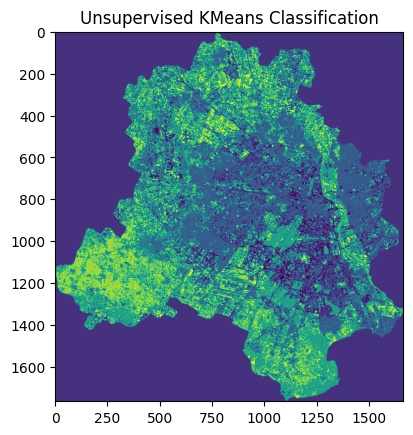

In [5]:
# Visualize classified raster
plt.imshow(classified_image)
plt.title("Unsupervised KMeans Classification")
plt.show()

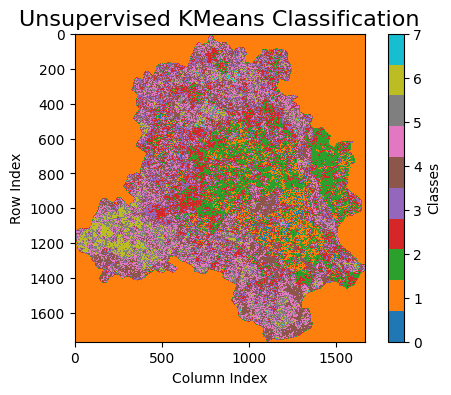

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of classes
n_classes = 8

# Ensure classified_image values align with the number of classes
assert np.unique(classified_image).max() < n_classes, "Classified image has more classes than specified."

# Plot the classified raster
plt.figure(figsize=(6, 4))
plt.imshow(classified_image, cmap='tab10', vmin=0, vmax=n_classes - 1)  # Use a categorical colormap
plt.title("Unsupervised KMeans Classification", fontsize=16)
plt.colorbar(ticks=range(n_classes), label="Classes")  # Add colorbar with class labels
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.grid(False)  # Turn off grid
plt.show()